In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np


df = pd.read_csv('vietnam_housing_dataset_final_2.csv')

ModuleNotFoundError: No module named 'sklearn'

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df.drop(['Price'], axis=1)
Y = df['Price']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.20185917019430383

In [35]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.38123136698275756


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid) 

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score


Learning rate set to 0.063736
0:	learn: 2.1863180	total: 11.3ms	remaining: 11.3s
1:	learn: 2.1421941	total: 23.3ms	remaining: 11.6s
2:	learn: 2.1029651	total: 33.7ms	remaining: 11.2s
3:	learn: 2.0689070	total: 46.4ms	remaining: 11.6s
4:	learn: 2.0350906	total: 59.2ms	remaining: 11.8s
5:	learn: 2.0077457	total: 68.9ms	remaining: 11.4s
6:	learn: 1.9803965	total: 77.5ms	remaining: 11s
7:	learn: 1.9528098	total: 86.1ms	remaining: 10.7s
8:	learn: 1.9300944	total: 95.8ms	remaining: 10.5s
9:	learn: 1.9084437	total: 106ms	remaining: 10.5s
10:	learn: 1.8910223	total: 115ms	remaining: 10.4s
11:	learn: 1.8728037	total: 125ms	remaining: 10.3s
12:	learn: 1.8592508	total: 134ms	remaining: 10.2s
13:	learn: 1.8461514	total: 142ms	remaining: 10s
14:	learn: 1.8327706	total: 151ms	remaining: 9.89s
15:	learn: 1.8160962	total: 159ms	remaining: 9.76s
16:	learn: 1.8039325	total: 167ms	remaining: 9.65s
17:	learn: 1.7912045	total: 175ms	remaining: 9.55s
18:	learn: 1.7755152	total: 183ms	remaining: 9.46s
19:	le

0.6789253666264632

In [37]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.4489082176403008


In [63]:
def predict_house_price(area, frontage, access_road, 
                     floors, bedrooms, bathrooms, 
                     Ma_TP, Ma_QH, Ma_PX):
    
    input_data = pd.DataFrame({
        'Area': [area],
        'Frontage': [frontage],
        'Access Road': [access_road],
        'Floors': [floors],
        'Bedrooms': [bedrooms],
        'Bathrooms': [bathrooms],
        'Ma_TP': [Ma_TP],
        'Ma_QH': [Ma_QH],
        'Ma_PX': [Ma_PX] 
    })
    
    predicted_price = model_RFR.predict(input_data)[0]
    return predicted_price

area = 140.0
frontage = 6.0
access_road = 13.0
floors = 3.0
bedrooms = 5.0
bathrooms = 5.0
Ma_TP = 33.0
Ma_QH = 326.0
Ma_PX = 12031.0

predicted_price = predict_house_price(area, frontage, access_road, 
                     floors, bedrooms, bathrooms,
                     Ma_TP, Ma_QH, Ma_PX)

print(f"Giá nhà dự đoán: {predicted_price:.2f}")

Giá nhà dự đoán: 7.10


In [64]:
correlation = df['Area'].corr(df['Price'])
print(f"Hệ số tương quan giữa Area và Price: {correlation}")

Hệ số tương quan giữa Area và Price: 0.09256337865738597


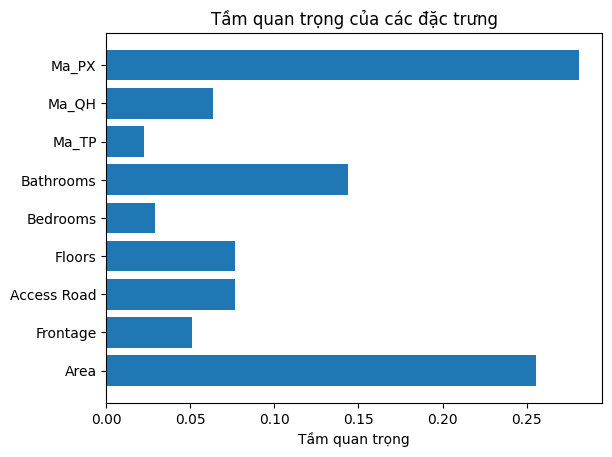

In [65]:
import matplotlib.pyplot as plt

feature_importances = model_RFR.feature_importances_
feature_names = X_train.columns

plt.barh(feature_names, feature_importances)
plt.xlabel('Tầm quan trọng')
plt.title('Tầm quan trọng của các đặc trưng')
plt.show()